In [1]:
import pandas as pd
data = pd.read_csv("combined_synthetic_dataset.csv")
data.head()

,patient_id,age,gender,diagnosis,medications,treatment_plan,heart_rate,blood_pressure_systolic,blood_pressure_diastolic,oxygen_saturation,...,cholesterol_level,hemoglobin,white_blood_cell_count,ventilator_setting,dialysis_machine,cardiac_monitor,level_of_consciousness,breathing_rate,pulse_rate,outcome
0,1,69,1,1,0,2,98,135,78,88,...,201,12.484757,8.765534,0,0,1,1,22,90,1
1,2,32,1,0,3,1,91,158,76,90,...,212,13.756085,5.239948,2,1,1,0,16,86,0
2,3,89,0,3,0,2,76,168,92,92,...,223,16.186200,6.545394,1,0,0,2,18,76,0
3,4,78,1,1,3,1,94,187,71,89,...,212,12.333985,8.614250,1,0,0,2,19,82,1
4,5,38,1,2,1,0,96,140,62,74,...,166,16.711718,12.952196,3,1,0,1,12,72,1


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
np.random.seed(42)
combined_df= pd.read_csv('combined_synthetic_dataset.csv')
label_encoders = {}
for column in combined_df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    combined_df[column] = label_encoders[column].fit_transform(combined_df[column])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(combined_df.drop(columns=['patient_id', 'outcome']))
X = pd.DataFrame(scaled_features, columns=combined_df.drop(columns=['patient_id', 'outcome']).columns)
y = combined_df['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)



/tmp/ipykernel_1936/3586423445.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


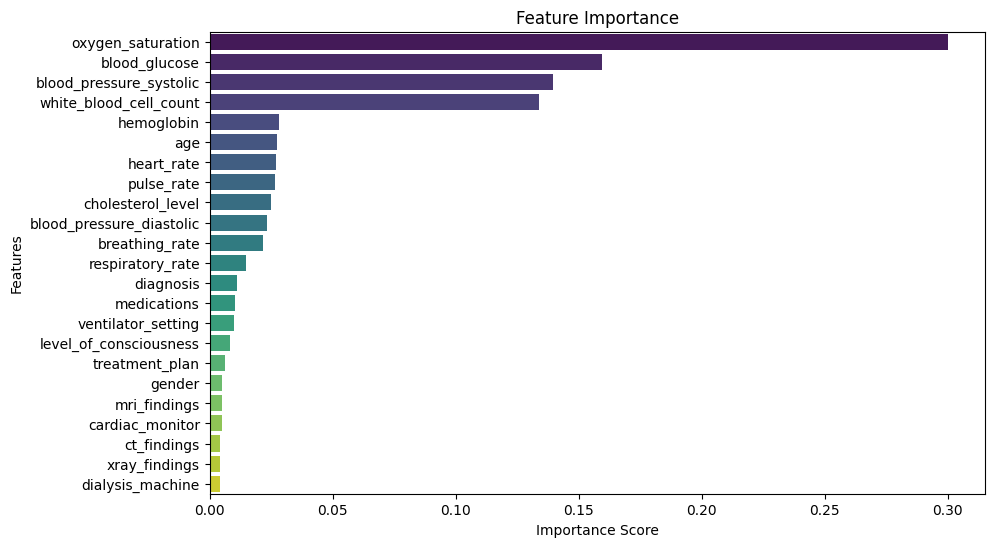

In [9]:
# Feature importances
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
feature_importances = clf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

Oxygen Saturation: This is the most important feature, indicating that the level of oxygen in the blood is a critical factor for the prediction.
Blood Glucose and Blood Pressure (Systolic) are also highly important, reflecting that metabolic and cardiovascular health are significant indicators in the model's prediction.
White Blood Cell Count and Hemoglobin: These features likely correlate with the patient's immune response and oxygen-carrying capacity, crucial in assessing their condition.

Confusion Matrix:
 [[109   0]
 [ 17  74]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       109
           1       1.00      0.81      0.90        91

    accuracy                           0.92       200
   macro avg       0.93      0.91      0.91       200
weighted avg       0.93      0.92      0.91       200

AUC-ROC: 0.9755519709648149


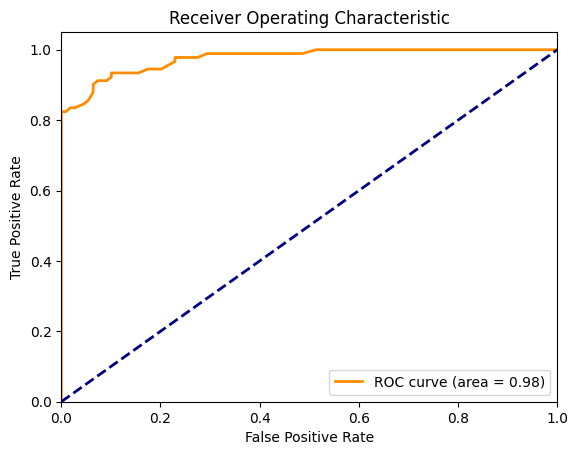

In [10]:
#confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))
y_pred_proba = clf.predict_proba(X_test)[:, 1] 
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC:", roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

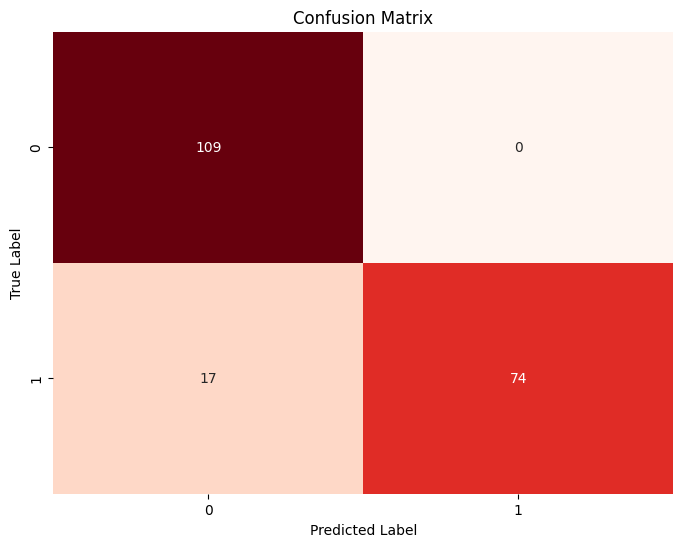

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


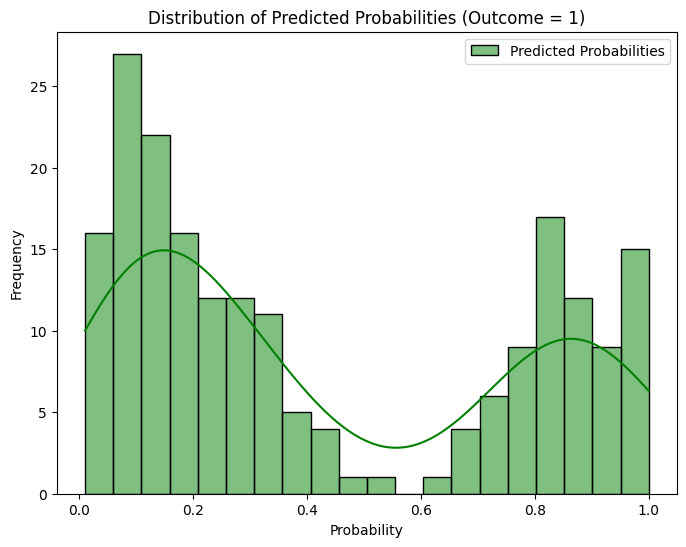

In [19]:
# Plot distribution of probabilities for the positive class (outcome=1)
y_probs = clf.predict_proba(X_test)
plt.figure(figsize=(8, 6))
sns.histplot(y_probs[:, 1], kde=True, bins=20, color='green', label='Predicted Probabilities')
plt.title('Distribution of Predicted Probabilities (Outcome = 1)')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()

/tmp/ipykernel_1936/2036106865.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vitals['anomaly'] = iso_forest.fit_predict(vitals)


Number of detected anomalies: 50


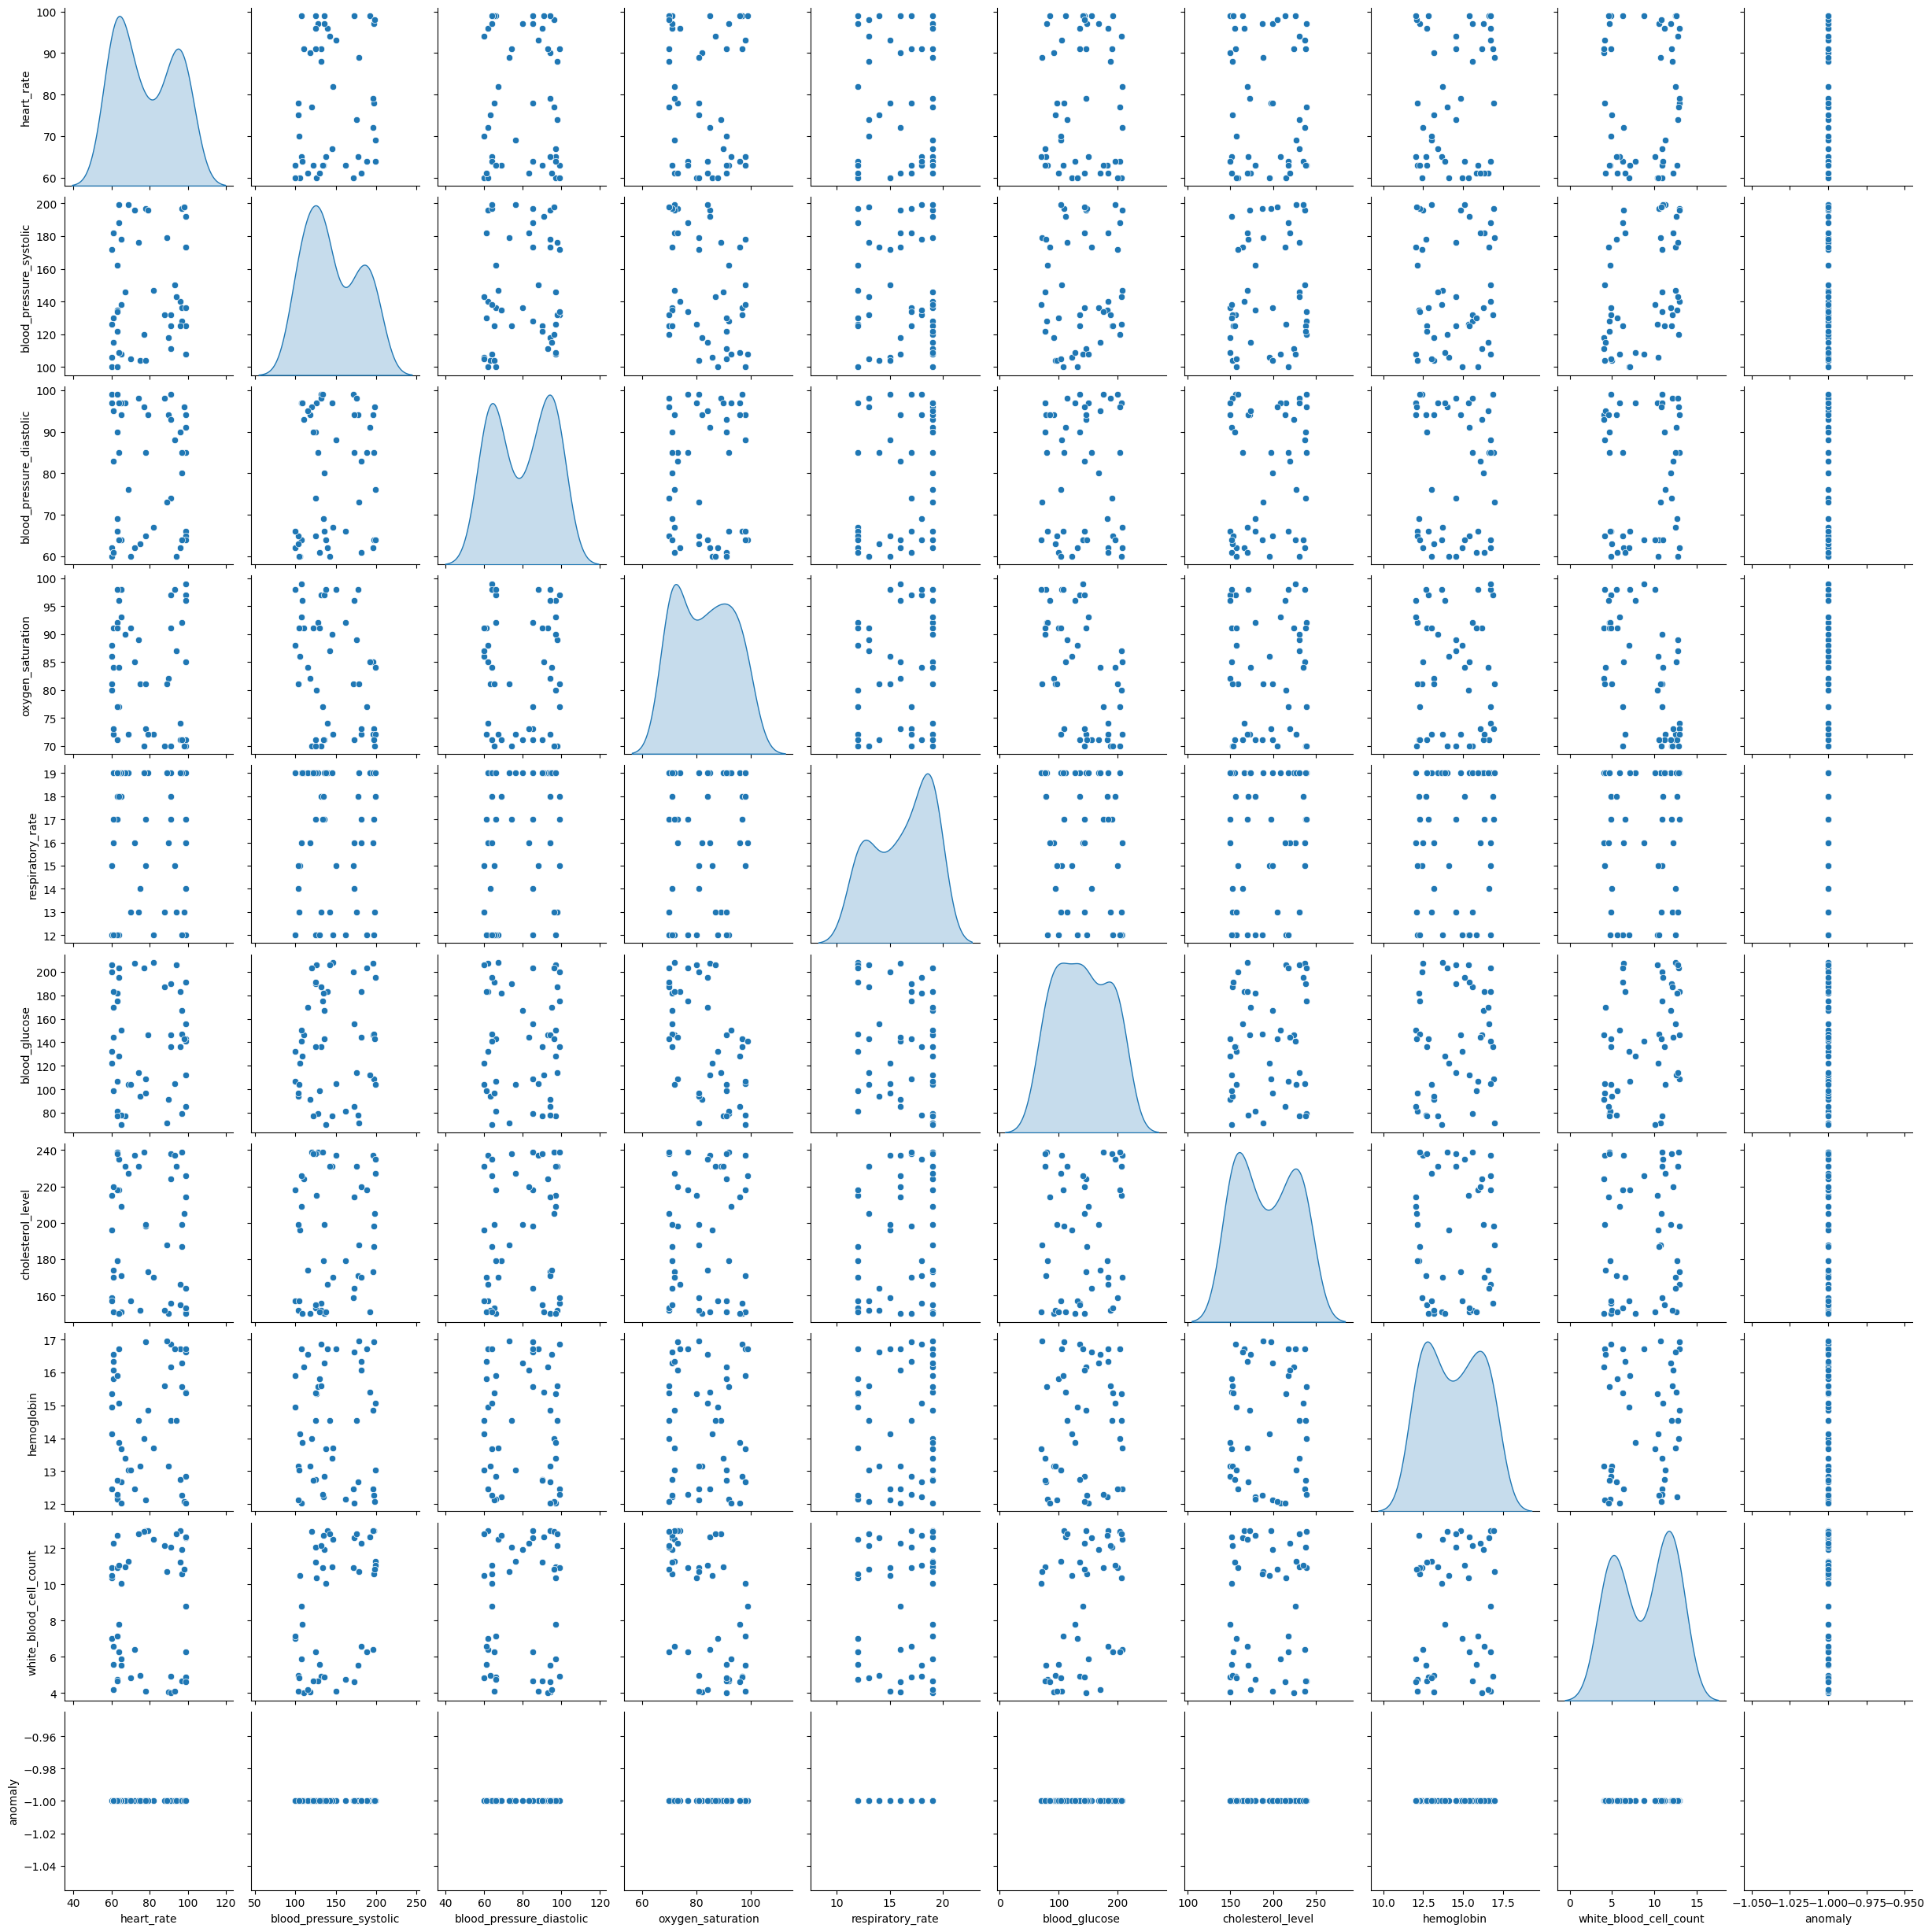

In [20]:
#finding anamolies using vital signs datas
from sklearn.ensemble import IsolationForest
vitals = data[['heart_rate', 'blood_pressure_systolic', 'blood_pressure_diastolic',
               'oxygen_saturation', 'respiratory_rate', 'blood_glucose',
               'cholesterol_level', 'hemoglobin', 'white_blood_cell_count']]
iso_forest = IsolationForest(contamination=0.05) 
vitals['anomaly'] = iso_forest.fit_predict(vitals)
outliers = vitals[vitals['anomaly'] == -1]
print(f"Number of detected anomalies: {outliers.shape[0]}")
import seaborn as sns
sns.pairplot(vitals[vitals['anomaly'] == -1], diag_kind='kde')
plt.show()


In [21]:
##showing which row has anamolies##
anomalies = vitals[vitals['anomaly'] == -1]
anomaly_rows = anomalies.index# Get the indices (rows) where anomalies are detected
anomalous_data = data.loc[anomaly_rows]# Print the specific rows with anomalies from the original dataset
print("Anomalies detected in the following rows:")
print(anomalous_data)


Anomalies detected in the following rows:
     patient_id  age  gender  diagnosis  medications  treatment_plan  \
4             5   38       1          2            1               0   
5             6   41       1          1            1               1   
28           29   68       0          0            2               1   
66           67   79       1          4            2               0   
92           93   29       1          2            0               1   
110         111   59       0          0            3               2   
127         128   62       0          2            1               2   
145         146   79       0          1            0               1   
156         157   29       1          1            0               1   
174         175   72       1          0            1               1   
190         191   84       0          3            2               1   
246         247   65       1          3            1               0   
259         260   81  

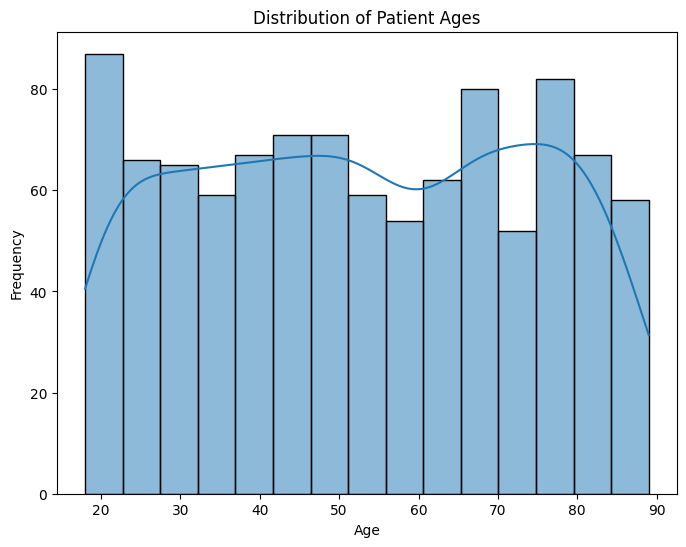

In [22]:
#Distribution of Patient Ages
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=15, kde=True)
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


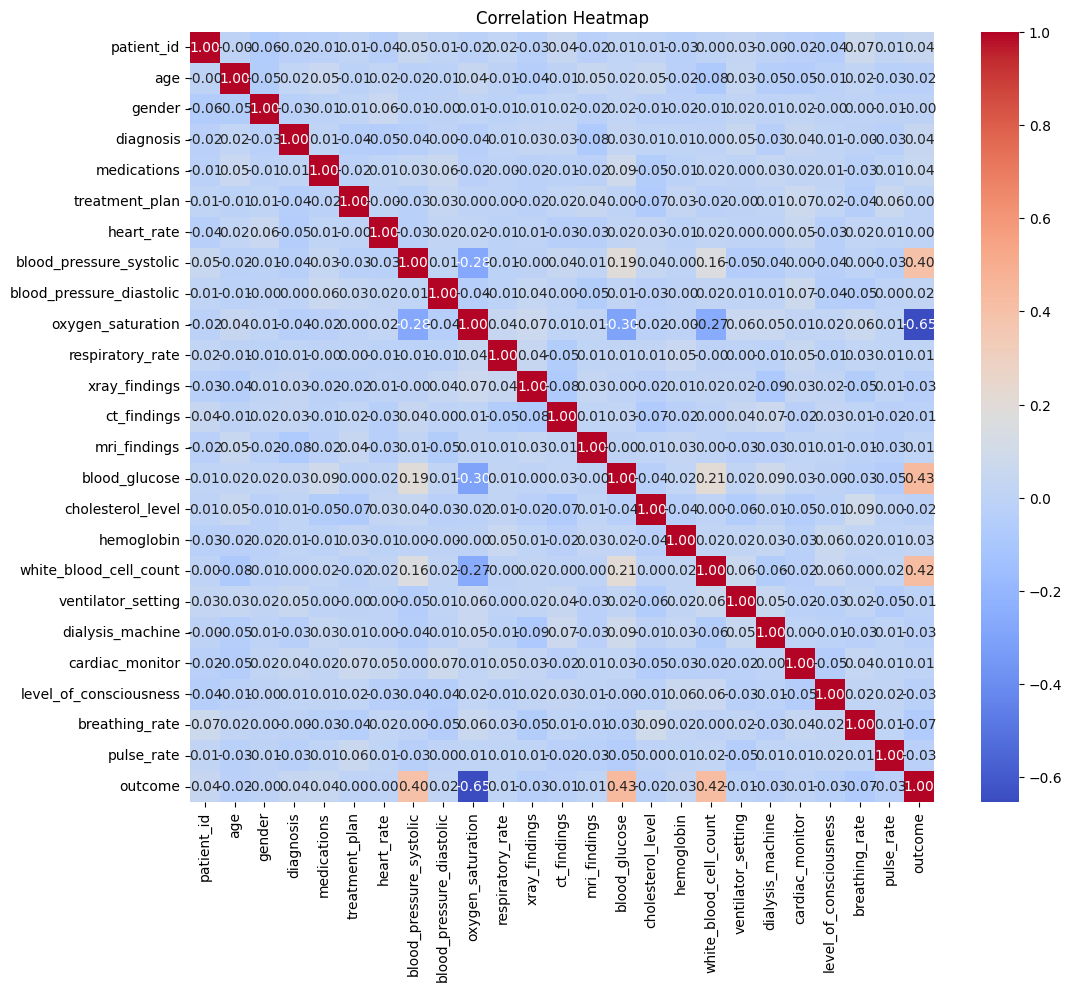

In [25]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


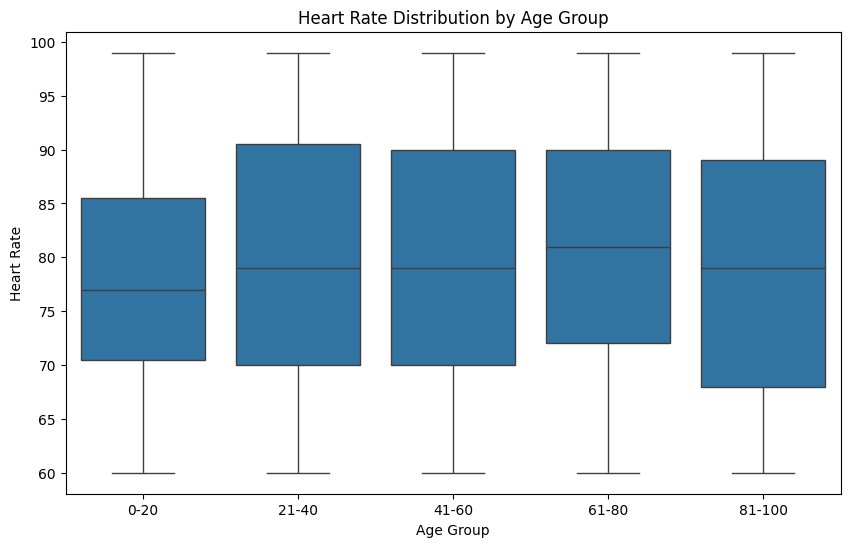

In [26]:
# Box plot: Heart Rate by Age Group
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='heart_rate', data=data)
plt.title('Heart Rate Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Heart Rate')
plt.show()


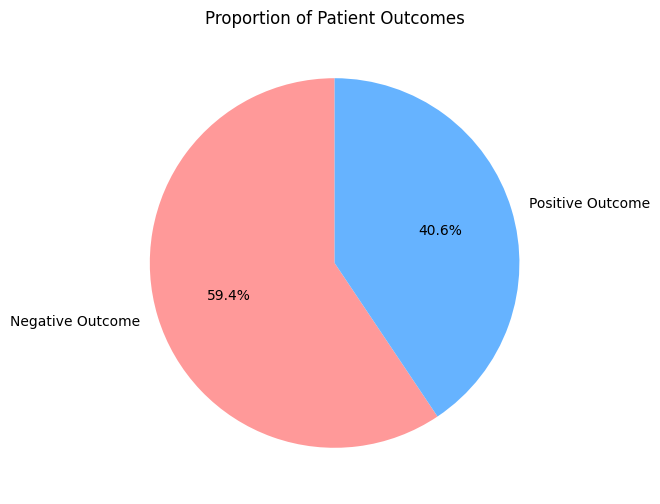

In [27]:
# Outcome proportion pie chart
outcome_counts = data['outcome'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=['Negative Outcome', 'Positive Outcome'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Patient Outcomes')
plt.show()


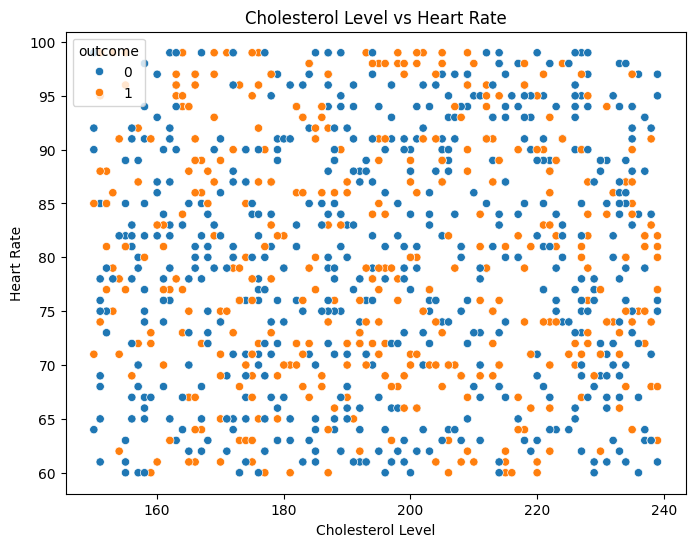

In [28]:
# Scatter plot: Cholesterol vs Heart Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='cholesterol_level', y='heart_rate', hue='outcome', data=data)
plt.title('Cholesterol Level vs Heart Rate')
plt.xlabel('Cholesterol Level')
plt.ylabel('Heart Rate')
plt.show()



Patients with cholesterol levels ranging from 160 to 240 and heart rates between 60 and 100 show a mix of both outcomes. This suggests that, based on the visual alone, cholesterol and heart rate alone may not be strong individual predictors of outcomes without considering other factors.


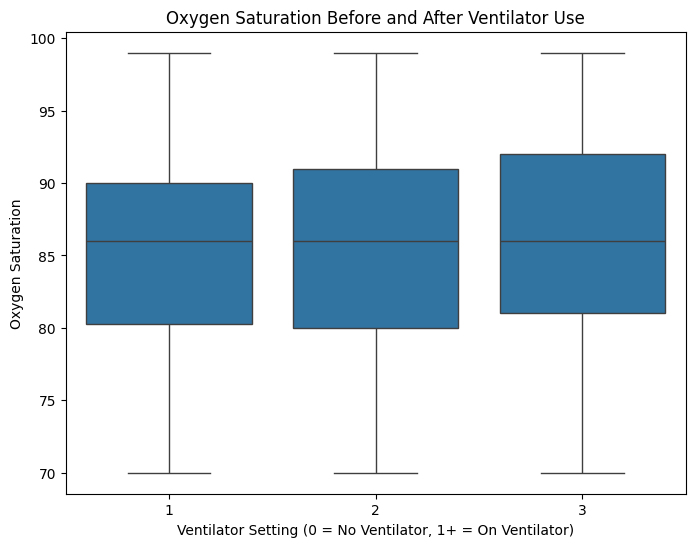

In [32]:
# Bar plot: Oxygen Saturation before and after ventilator use
ventilator_use = data[data['ventilator_setting'] > 0]
plt.figure(figsize=(8, 6))
sns.boxplot(x='ventilator_setting', y='oxygen_saturation', data=ventilator_use)
plt.title('Oxygen Saturation Before and After Ventilator Use')
plt.xlabel('Ventilator Setting (0 = No Ventilator, 1+ = On Ventilator)')
plt.ylabel('Oxygen Saturation')
plt.show()



There seems to be little variation in oxygen saturation levels before and after adjusting the ventilator settings, as the box plots for settings 1, 2, and 3 are quite similar. This could suggest that ventilator use is effective at maintaining stable oxygen levels across different settings, or that other factors are influencing oxygen saturation.